In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [6]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [7]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

<AxesSubplot:xlabel='Date'>

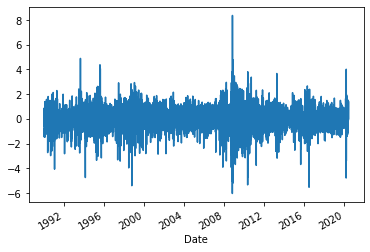

In [9]:
returns = cad_jpy_df.Price.pct_change() * 100
returns.plot()

In [11]:
cad_jpy_df

,Price,Open,High,Low,Return
Date,,,,,
1990-01-02,126.37,126.31,126.37,126.31,NaN
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
...,...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508


In [12]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
# YOUR CODE HERE!
returns = cad_jpy_df.Price.pct_change() * 100
#returns = returns.dropna()
cad_jpy_df['Return'] = returns
cad_jpy_df.tail()





,Price,Open,High,Low,Return
Date,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508
2020-06-03,80.70,80.40,80.82,79.96,0.373134
2020-06-04,80.71,80.80,80.89,80.51,0.012392


### Lagged Returns 

In [13]:
# Create a lagged return using the shift function
# YOUR CODE HERE!
cad_jpy_df['Lag1'] = cad_jpy_df.Return.shift()
cad_jpy_df.dropna(inplace=True)
cad_jpy_df.tail()

,Price,Open,High,Low,Return,Lag1
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756
2020-06-03,80.70,80.40,80.82,79.96,0.373134,1.425508
2020-06-04,80.71,80.80,80.89,80.51,0.012392,0.373134


### Train Test Split

In [14]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [17]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
# YOUR CODE HERE!
X_train = train[['Lag1']]
X_test = test[['Lag1']]
Y_train = train['Return']
Y_test = test['Return']


In [18]:
X_train.head()

,Lag1
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


In [19]:
# Preview the X_train data
# YOUR CODE HERE!
X_train.head()

,Lag1
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


# Linear Regression Model

In [20]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE!
lin_reg = LinearRegression().fit(X_train, Y_train)


# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [21]:
# Make a prediction of "y" values using just the test dataset
# YOUR CODE HERE!
predictions = lin_reg.predict(X_test)

In [22]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
# YOUR CODE HERE!
actual_y = pd.DataFrame(Y_test, columns=['Actual'])

In [26]:
Y_test

Date
2018-01-01    0.245591
2018-01-02   -0.055679
2018-01-03    0.011142
2018-01-04    0.601604
2018-01-05    0.919158
                ...   
2020-05-29    0.076697
2020-06-01    1.251756
2020-06-02    1.425508
2020-06-03    0.373134
2020-06-04    0.012392
Name: Return, Length: 634, dtype: float64

In [27]:
result_df = pd.DataFrame()
result_df['Actual'] = Y_test
result_df['Predicted'] = predictions

In [28]:
result_df

,Actual,Predicted
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366
...,...,...
2020-05-29,0.076697,0.001846
2020-06-01,1.251756,-0.003024
2020-06-02,1.425508,-0.032890


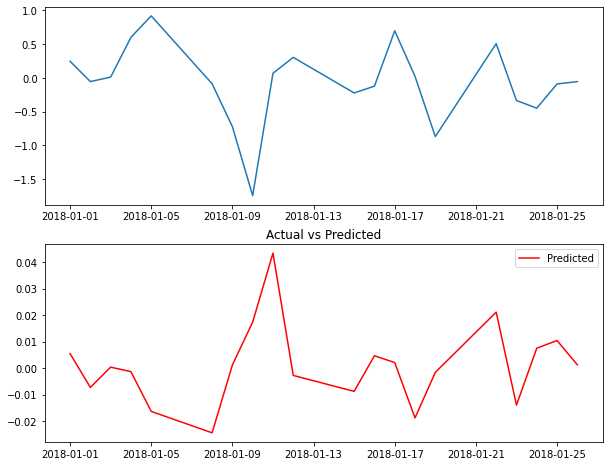

<Figure size 432x288 with 0 Axes>

In [38]:
# 2 row 1 column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# create two subplots
plt.subplot(2, 1, 1)
plt.plot(result_df['Actual'][:20], label='Actual')
plt.subplot(2, 1, 2)
plt.plot(result_df['Predicted'][:20], label='Predicted', color='red')

plt.legend()
plt.title('Actual vs Predicted')
plt.show()
plt.tight_layout()


# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [39]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

print("Out-of-Sample Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, predictions)))

Out-of-Sample Root Mean Squared Error: 0.6445805658569028


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [42]:
Y_train

Date
1990-01-04   -1.468476
1990-01-05    0.874777
1990-01-08   -0.216798
1990-01-09    0.667901
1990-01-10    0.567546
                ...   
2017-12-25    0.033723
2017-12-26    0.269693
2017-12-27    0.392245
2017-12-28    0.256754
2017-12-29   -0.256096
Name: Return, Length: 7293, dtype: float64

In [43]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
res = pd.DataFrame(Y_train.values, columns=['Actual'])

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!
res['Predicted'] = lin_reg.predict(X_train)

res = res.dropna()
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
print("In-Sample Root Mean Squared Error:", np.sqrt(mean_squared_error(res['Actual'], res['Predicted'])))

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!
print("In-Sample Root Mean Squared Error:", np.sqrt(mean_squared_error(res['Actual'], res['Predicted'])))

In-Sample Root Mean Squared Error: 0.841994632894117
In-Sample Root Mean Squared Error: 0.841994632894117


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE

My model performs well for the in-sample data compared to out of sample data